## Programming Exercise 2 - Logistic Regression



In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import sys

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

### Logistic regression

In [4]:
data = loaddata('data/ex2data1.txt', ',')

('Dimensions: ', (100, 3))
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [5]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]] # Here we add one as first column X_0
y = np.c_[data[:,2]]

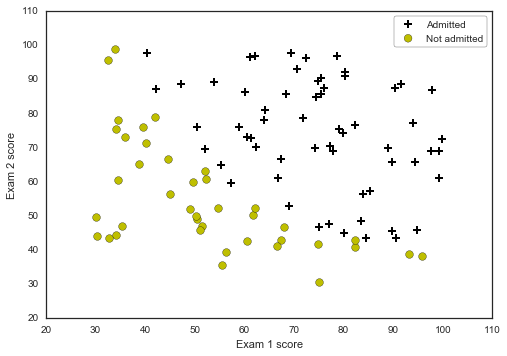

In [6]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

### Question  1 : Sigmoid (logistic) function implementation

#### Logistic regression hypothesis
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [7]:
# hint : use np.exp()
def sigmoid(z):
    s = 0.0
    # your code here
    s = (1.0 / (1.0 + np.exp(-z)))
    return s

print sigmoid(1) # should be giving : ~ 0.731
print sigmoid(0) # should be giving : ~ 0.5
print sigmoid(-1) # should be giving : ~ 0.268

0.73105857863
0.5
0.26894142137


Scipy actually has a convenience function which does exactly the same:<BR>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit

In [8]:
print scipy.special.expit(1)
print scipy.special.expit(0)
print scipy.special.expit(-1)

0.73105857863
0.5
0.26894142137


### Question 2 : Cost function implementation

#### Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [46]:
# hint : use np.log()
def costFunction(theta, X, y):
    m = y.size
    
    h = sigmoid(X.dot(theta))
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    # your code here : code should be vectorized and should be working for any dataset size
    
    # here we are checking if found value is a NaN (not a number)
    if np.isnan(J[0]):
        return(np.inf)
    
    # J is now a matrix of size (1x1). We return the J[0]
    return(J[0])

initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)

print 'initial_theta : ', initial_theta
print 'Initial cost : ', cost # Should be 0.69314

NameError: global name 'J' is not defined

### Question 3 : Derivative implementation

#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


In [45]:
# hint : to obtain an array from nx1 matrix a, use a.ravel()
def gradient(theta, X, y):
    m = y.size
    grad = np.zeros(theta.size)
    # your code here
    
    return(grad)

grad = gradient(initial_theta, X, y)
print 'Gradient value : ', grad # should be [ -0.1        -12.00921659 -11.26284221]

Gradient value :  [ 0.  0.  0.]


#### Optimize cost function

In [11]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
print res

      fun: 0.2034977015894407
 hess_inv: array([[  3.24739469e+03,  -2.59380769e+01,  -2.63469561e+01],
       [ -2.59380769e+01,   2.21449124e-01,   1.97772068e-01],
       [ -2.63469561e+01,   1.97772068e-01,   2.29018831e-01]])
      jac: array([ -2.73305243e-10,   1.43144030e-07,  -1.58965799e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 23
     njev: 28
   status: 0
  success: True
        x: array([-25.16133401,   0.20623172,   0.2014716 ])


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


### Question 4 : Prediction


In [43]:
# Predict output for a student with Exam 1 score 45 and Exam 2 score 85
# Theta value obtained after optimization is res.x

x = np.array([45, 85])
#your code here (value should be 0.7762)


In [44]:
# this function should return True or False
# hint : to threshold an array a you can use : a > 0.5
def predict(theta, X, threshold=0.5):
    p = np.zeros(X.shape[0])
    # your code here
    return(p.astype('int'))

print predict(res.x, X[0:10, :]) # should return [0 0 0 1 1 0 1 0 1 1]

[0 0 0 0 0 0 0 0 0 0]


In [14]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100.0*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


#### Decision boundary

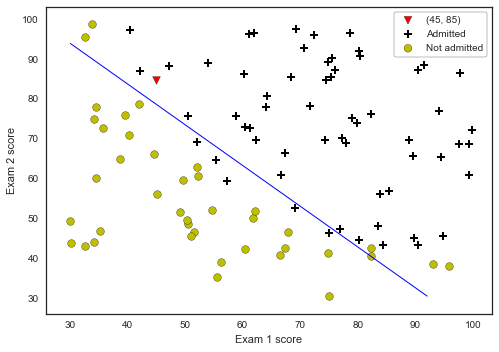

In [15]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

### Microchip Data

In [16]:
data2 = loaddata('data/ex2data2.txt', ',')

('Dimensions: ', (118, 3))
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [17]:
y2 = np.c_[data2[:,2]]
X2 = data2[:,0:2]

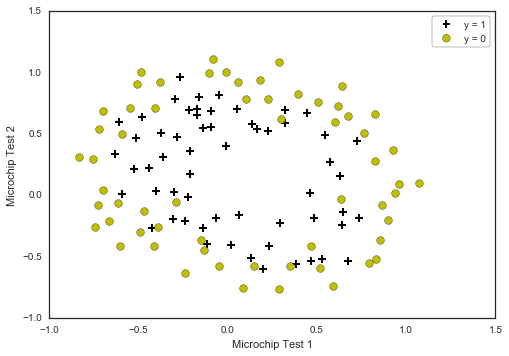

In [18]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

#### Polynomial feature transform

$mapFeatures(X) = \begin{bmatrix}
1\\ x_1\\ x_2\\ x_{1}^{2}\\ x_{2}^{2}\\ x_{1} x_{2}\\
\vdots \\ 
 x_{1} x_{2}^{5}\\ x_{2}^{6}\\
\end{bmatrix}$ 

In [19]:
def mapFeatures(X):
    poly = PolynomialFeatures(6)
    XX = poly.fit_transform(data2[:,0:2])
    
    return XX
    

Original data size :  (118, 2)
Transformed data size :  (118, 28)
Accuracy 91.5254237288


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


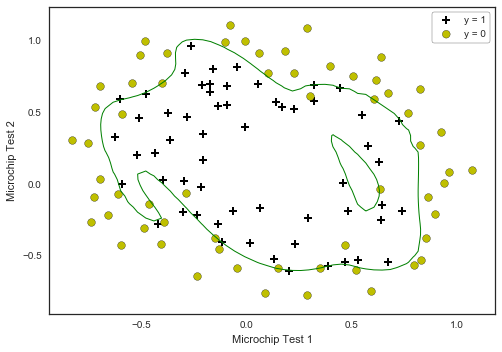

In [20]:
print 'Original data size : ', data2[:,0:2].shape
XX = mapFeatures(X)
print 'Transformed data size : ', XX.shape

poly = PolynomialFeatures(6)
initial_theta2 = np.zeros(XX.shape[1])
res2 = minimize(costFunction, initial_theta2, args=(XX, y2), method=None, jac=gradient, options={'maxiter':3000})

# Accuracy
accuracy = 100.0*sum(predict(res2.x, XX) == y2.ravel())/y2.size    
print 'Accuracy', accuracy

# Scatter plot of X,y
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

# Plot decisionboundary
x1_min, x1_max = X2[:,0].min(), X2[:,0].max(),
x2_min, x2_max = X2[:,1].min(), X2[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
# plt.set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))
